In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
customer_ds = pd.read_csv('data/customer_data_dirty.csv')
purchase_ds = pd.read_csv('data/purchase_data_dirty.csv')

In [3]:
customer_ds.head()

,CustomerID,Name,Age,Gender,Income
0,101,Amit,25.0,M,45000.0
1,102,Riya,NaN,Female,52000.0
2,103,John,-5.0,Male,60000.0
3,104,Meena,250.0,F,48000.0
4,105,Rahul,35.0,male,NaN


In [4]:
purchase_ds.head()

,PurchaseID,CustomerID,ProductCategory,PurchaseAmount
0,P001,101,Electronics,12000.0
1,P002,102,electronics,NaN
2,P003,103,Furniture,18000.0
3,P004,104,Clothing,8000.0
4,P005,105,Electronics,22000.0


# 1 Handle Missing Value

## i. Replace missing Age with median age

In [5]:
customer_ds['Age'].isna().value_counts()

Age
False    46
True      5
Name: count, dtype: int64

In [107]:
customer_ds['Age'] = customer_ds['Age'].fillna(customer_ds['Age'].median(), inplace=True)
customer_ds['Age'].head()

C:\Users\RAUT\AppData\Local\Temp\ipykernel_16812\837422494.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  customer_ds['Age'] = customer_ds['Age'].fillna(customer_ds['Age'].median(), inplace=True)


0    25.0
1    34.0
4    35.0
5    29.0
6    41.0
Name: Age, dtype: float64

## ii. Replace missing Income with mean income

In [7]:
customer_ds['Income'].isna().value_counts()

Income
False    46
True      5
Name: count, dtype: int64

In [8]:
customer_ds['Income'].mean()

np.float64(56673.913043478264)

In [106]:
customer_ds['Income'] = customer_ds['Income'].fillna(customer_ds['Income'].mean(), inplace=True)

customer_ds['Income'].head(10)

C:\Users\RAUT\AppData\Local\Temp\ipykernel_16812\2322399247.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  customer_ds['Income'] = customer_ds['Income'].fillna(customer_ds['Income'].mean(), inplace=True)


0     45000.000000
1     52000.000000
4     56673.913043
5     55000.000000
6     62000.000000
7     58000.000000
8     70000.000000
9     51000.000000
10    65000.000000
11    54000.000000
Name: Income, dtype: float64

## iii. Replace missing PurchaseAmount with 0

In [10]:
purchase_ds['PurchaseAmount'].isna().value_counts()

PurchaseAmount
False    46
True      7
Name: count, dtype: int64

In [105]:
purchase_ds['PurchaseAmount'] = purchase_ds['PurchaseAmount'].fillna(0)
purchase_ds['PurchaseAmount'].head()

0    12000.0
1        0.0
2    18000.0
3     8000.0
4    22000.0
Name: PurchaseAmount, dtype: float64

# 2. Correct Invalid Values

## Remove records where Age < 0 or Age > 100

In [104]:
customer_ds = customer_ds[
    (customer_ds['Age'] > 0) & (customer_ds['Age'] < 100)
]

customer_ds['Age'].head()

0    25.0
1    34.0
4    35.0
5    29.0
6    41.0
Name: Age, dtype: float64

# 3. Standardize Categorical Values

## i. Convert Gender values to only Male and Female

In [13]:
customer_ds['Gender'].value_counts()

Gender
M         17
F         11
Female    10
male       4
Male       3
female     2
Name: count, dtype: int64

In [14]:
(customer_ds['Gender']
 .str.strip()
 .replace(
     {
         'M': 'Male',
         'male': 'Male',
         'F': 'Female',
         'female': 'Female'
     }
 )
 ).head()

0      Male
1    Female
4      Male
5    Female
6      Male
Name: Gender, dtype: str

## ii. Convert ProductCategory to lowercase

In [15]:
purchase_ds['ProductCategory'].str.lower()

0     electronics
1     electronics
2       furniture
3        clothing
4     electronics
5     electronics
6       furniture
7        clothing
8     electronics
9     electronics
10      furniture
11       clothing
12    electronics
13    electronics
14      furniture
15       clothing
16    electronics
17    electronics
18      furniture
19       clothing
20    electronics
21    electronics
22      furniture
23       clothing
24    electronics
25    electronics
26      furniture
27       clothing
28    electronics
29    electronics
30      furniture
31       clothing
32    electronics
33    electronics
34      furniture
35       clothing
36    electronics
37    electronics
38      furniture
39       clothing
40    electronics
41    electronics
42      furniture
43       clothing
44    electronics
45    electronics
46      furniture
47       clothing
48    electronics
49    electronics
50    electronics
51      furniture
52       clothing
Name: ProductCategory, dtype: str

In [16]:
purchase_ds['ProductCategory'].str.lower().unique()

<StringArray>
['electronics', 'furniture', 'clothing']
Length: 3, dtype: str

# 4. Remove Duplicate Records

## Remove duplicate rows based on CustomerID 

In [17]:
customer_ds['CustomerID'].head()

0    101
1    102
4    105
5    106
6    107
Name: CustomerID, dtype: int64

In [103]:
customer_ds.drop_duplicates(subset=['CustomerID'], inplace=True)
customer_ds['CustomerID'].nunique()

46

# 5. Perform equal width binning on the Income attribute

## i. Divide the Income attribute into 4 equal-width bins

## ii. Assign appropriate labels to each bin (Very Low, Low, Medium, High).

## iii. Create a new feature named Income_EqualWidth

In [19]:
customer_ds['Income_EqualWidth'] = pd.cut(
    customer_ds['Income'],
    bins=4,
    labels=['Very Low', 'Low', 'Medium', 'High']
)

customer_ds['Income_EqualWidth'].head(10)

0     Very Low
1          Low
4          Low
5          Low
6       Medium
7          Low
8         High
9     Very Low
10      Medium
11         Low
Name: Income_EqualWidth, dtype: category
Categories (4, str): ['Very Low' < 'Low' < 'Medium' < 'High']

In [20]:
customer_ds.head()

,CustomerID,Name,Age,Gender,Income,Income_EqualWidth
0,101,Amit,25.0,M,45000.000000,Very Low
1,102,Riya,34.0,Female,52000.000000,Low
4,105,Rahul,35.0,male,56673.913043,Low
5,106,Sneha,29.0,Female,55000.000000,Low
6,107,Karan,41.0,M,62000.000000,Medium


## iv. Plot a histogram showing the distribution of customers across the equal-width bins.

Text(0, 0.5, 'frequency')

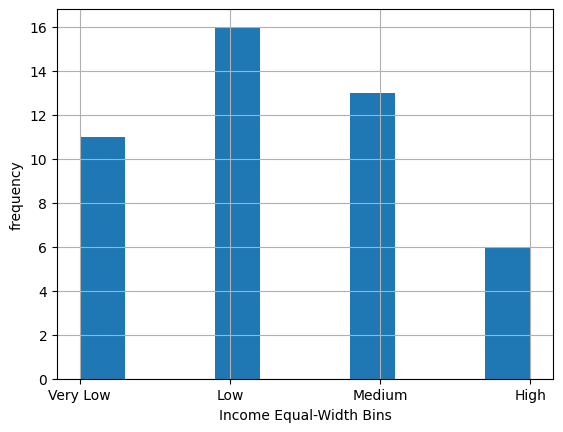

In [21]:
# plt.figure(figsize=(9, 9))
customer_ds['Income_EqualWidth'].hist()
plt.xlabel('Income Equal-Width Bins')
plt.ylabel('frequency')
# plt.grid(True)
# plt.show()

# 6. Perform Equal Frequency Binning

## i. Divide the Income attribute into 4 equal-frequency bins.

## ii. Assign labels (Q1, Q2, Q3, Q4)

## iii. Create a new feature named Income_EqualFrequency

In [22]:
# customer_ds['Income_EqualWidth'] = pd.cut(
#     customer_ds['Income'],
#     bins=4,
#     labels=['Very Low', 'Low', 'Medium', 'High']
# )

customer_ds['Income_EqualFrequency'] = pd.qcut(
    customer_ds['Income'],
    q=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

customer_ds['Income_EqualFrequency'].head()

0    Q1
1    Q1
4    Q2
5    Q2
6    Q3
Name: Income_EqualFrequency, dtype: category
Categories (4, str): ['Q1' < 'Q2' < 'Q3' < 'Q4']

## Plot a bar chart showing the number of customers in each bin

<Axes: xlabel='Income_EqualFrequency'>

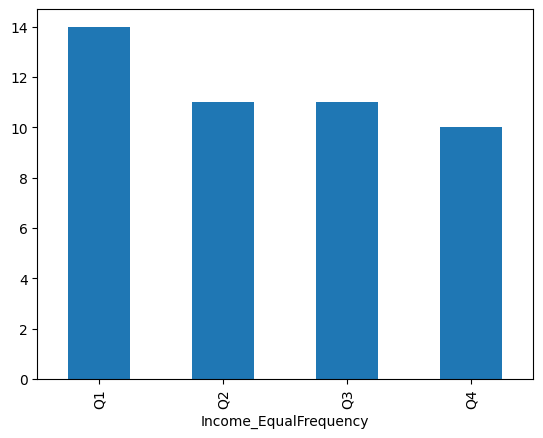

In [23]:
customer_ds['Income_EqualFrequency'].value_counts().plot(kind='bar')

# 7. Outlier detection

## i. Compute Z-scores for PurchaseAmount.

In [24]:
purchase_ds['PurchaseAmount'].head()

0    12000.0
1        0.0
2    18000.0
3     8000.0
4    22000.0
Name: PurchaseAmount, dtype: float64

In [25]:
purchase_ds['Zscore'] = zscore(purchase_ds['PurchaseAmount'])

purchase_ds['Zscore'].head()

0   -0.231364
1   -1.839532
2    0.572720
3   -0.767420
4    1.108776
Name: Zscore, dtype: float64

## ii. Identify records with Z-score > 3 or < −3

In [26]:
(abs(purchase_ds['Zscore']) > 3).value_counts()

Zscore
False    53
Name: count, dtype: int64

## iii. Display the outlier records

In [27]:
purchase_ds.head()

,PurchaseID,CustomerID,ProductCategory,PurchaseAmount,Zscore
0,P001,101,Electronics,12000.0,-0.231364
1,P002,102,electronics,0.0,-1.839532
2,P003,103,Furniture,18000.0,0.572720
3,P004,104,Clothing,8000.0,-0.767420
4,P005,105,Electronics,22000.0,1.108776


In [28]:
outliers = purchase_ds[abs(purchase_ds['Zscore']) > 3]

if not outliers.empty:
    print("Outliers detected:")
    print(outliers)
else:
    print("No outliers found based on the Z-score threshold of 3.")

No outliers found based on the Z-score threshold of 3.


## iv. Remove outliers and recompute the mean

In [29]:
new_mean = purchase_ds.loc[abs(purchase_ds['Zscore']) <= 3, 'PurchaseAmount'].mean()

print(new_mean)

13726.415094339623


# 8. Data Type Conversion

## Convert Income from string to float

In [30]:
customer_ds['Income'] = customer_ds['Income'].astype(float)

customer_ds['Income'].dtype

dtype('float64')

# 9. Normalization

## Normalize Age and Income using Min-Max  scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

customer_ds[['Normalized_Age', 'Normalized_Income']] = scaler.fit_transform(customer_ds[['Age', 'Income']])

# customer_ds[['Normalized_Age', 'Normalized_Income']].describe().loc[['min', 'max']]

customer_ds.head()

,CustomerID,Name,Age,Gender,Income,Income_EqualWidth,Income_EqualFrequency,Normalized_Age,Normalized_Income
0,101,Amit,25.0,M,45000.000000,Very Low,Q1,0.032258,0.000000
1,102,Riya,34.0,Female,52000.000000,Low,Q1,0.322581,0.259259
4,105,Rahul,35.0,male,56673.913043,Low,Q2,0.354839,0.432367
5,106,Sneha,29.0,Female,55000.000000,Low,Q2,0.161290,0.370370
6,107,Karan,41.0,M,62000.000000,Medium,Q3,0.548387,0.629630


# 10. Dataset Integration

## Perform inner join on CustomerID
(Drop orphan purchase records automatically)

In [61]:
merged_ds = customer_ds.merge(purchase_ds, on='CustomerID' ,how='inner')

merged_ds.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Income', 'Income_EqualWidth',
       'Income_EqualFrequency', 'Normalized_Age', 'Normalized_Income',
       'PurchaseID', 'ProductCategory', 'PurchaseAmount', 'Zscore'],
      dtype='str')

# 11. Feature Creation

## Create a new feature HighSpender
Mark 1 if PurchaseAmount > average, else 0

In [72]:
merged_ds['HighSpender'] = np.where(merged_ds['PurchaseAmount'] > merged_ds['PurchaseAmount'].mean(), 1, 0)

print(merged_ds['PurchaseAmount'].mean())
print(merged_ds[['PurchaseAmount', 'HighSpender']].head())

13521.739130434782
   PurchaseAmount  HighSpender
0         12000.0            0
1             0.0            0
2         22000.0            1
3         15000.0            1
4         17000.0            1


# 12. OLAP operations

## i. Perform slice operation to get total and average purchase amount for Female customers only

In [76]:
merged_ds['Gender'] = (merged_ds['Gender']
 .str.strip()
 .replace(
     {
         'M': 'Male',
         'male': 'Male',
         'F': 'Female',
         'female': 'Female'
     }
 )
 )

In [85]:
female_total = merged_ds.loc[merged_ds['Gender'] == 'Female', 'PurchaseAmount'].sum()

female_avg = merged_ds.loc[merged_ds['Gender'] == 'Female', 'PurchaseAmount'].mean()

print(f"Total Purchase: {female_total:.2f}")
print(f"Average Purchase: {female_avg:.2f}")

Total Purchase: 229500.00
Average Purchase: 9978.26


## ii. Perform dice operation for: Gender = Male, ProductCategory = Electronics.
Display number of purchases and average PurchaseAmount

In [90]:
# merged_ds['ProductCategory'] -> Electronics / electronics
# merged_ds['Gender'] -> Male

male_electronics = merged_ds[(merged_ds['Gender'].str.startswith(('M', 'm'))) 
                             & 
                             (merged_ds['ProductCategory'].str.startswith(('Elec', 'elec')))
                             ]

len(male_electronics)

14

## iii. Perform roll-up operation to compute total purchase amount by Gender

In [93]:
GenderWiseTotalPurchase = merged_ds.groupby('Gender')['PurchaseAmount'].sum()

GenderWiseTotalPurchase

Gender
Female    229500.0
Male      392500.0
Name: PurchaseAmount, dtype: float64

## iv. Perform drill down operation
Analyze purchase amount by Gender and ProductCategory

In [ ]:
merged_ds['ProductCategory'] = merged_ds['ProductCategory'].str.capitalize()

In [97]:
drill_down = merged_ds.groupby(['Gender', 'ProductCategory'])['PurchaseAmount'].agg(['sum', 'mean', 'count'])

drill_down.head()

sum          mean  count
Gender ProductCategory                               
Female Clothing          78400.0   7127.272727     11
       Electronics      151100.0  12591.666667     12
Male   Electronics      250500.0  17892.857143     14
       Furniture        142000.0  15777.777778      9

# 13. Apply one hot encoding to gender column
Add encoded columns to data set. Drop original gender column

In [99]:
pd.get_dummies(merged_ds, columns=['Gender'], prefix='Gender', dtype=int).head()

,CustomerID,Name,Age,Income,Income_EqualWidth,Income_EqualFrequency,Normalized_Age,Normalized_Income,PurchaseID,ProductCategory,PurchaseAmount,Zscore,HighSpender,Gender_Female,Gender_Male
0,101,Amit,25.0,45000.000000,Very Low,Q1,0.032258,0.000000,P001,Electronics,12000.0,-0.231364,0,0,1
1,102,Riya,34.0,52000.000000,Low,Q1,0.322581,0.259259,P002,Electronics,0.0,-1.839532,0,1,0
2,105,Rahul,35.0,56673.913043,Low,Q2,0.354839,0.432367,P005,Electronics,22000.0,1.108776,1,0,1
3,106,Sneha,29.0,55000.000000,Low,Q2,0.161290,0.370370,P006,Electronics,15000.0,0.170678,1,1,0
4,107,Karan,41.0,62000.000000,Medium,Q3,0.548387,0.629630,P007,Furniture,17000.0,0.438706,1,0,1
